In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Preprocessing

As many of the columns contains 'Unspecified' value, hence replace them with NaN.

In [2]:
#import dataset
dataset=pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")
dataset.replace('Unspecified',np.NaN,inplace=True)
dataset.columns

C:\Users\admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [154]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

As visible below, many columns contains a lot of null Values.



    Make a list of columns which contains null values or irrlevate data.
    Its safe to drop these columns.
    We will retain 'Agency' column, hence 'Agency Name' will be dropped as both have similar values.
    Facility Type has only 'Precinct' value, hence not relevant.
    Column 'Due Date' and 'Resolution Action Updated Date' are not relevant to the analysis.



In [155]:
dataset=dataset.drop(['Agency Name','Incident Address','Street Name','Cross Street 1','Cross Street 2','Intersection Street 1',
'Intersection Street 2','Address Type','Park Facility Name','Park Borough','School Name',
'School Number','School Region','School Code','School Phone Number','School Address','School City',
'School State','School Zip','School Not Found','School or Citywide Complaint','Vehicle Type',
'Taxi Company Borough','Taxi Pick Up Location','Bridge Highway Name','Bridge Highway Direction',
'Road Ramp','Bridge Highway Segment','Garage Lot Name','Ferry Direction','Ferry Terminal Name','Landmark',
'X Coordinate (State Plane)','Y Coordinate (State Plane)','Due Date','Resolution Action Updated Date',
'Community Board','Facility Type','Location'],axis=1)

In [156]:
dataset['Status'].value_counts()

Closed      298471
Open          1439
Assigned       786
Draft            2
Name: Status, dtype: int64

As most of the requests are 'Closed', hence our analysis will include only 'Closed' requests and we will drop other records.

Then we will drop the 'Status' column.

Selecting not null values of 'Latitude', 'Longitude' and 'Descriptor' column values will furthere remove empty values.

In [157]:
dataset=dataset[dataset['Status']=='Closed']
dataset.drop(['Status'], inplace=True, axis=1)

In [158]:
dataset.head()

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Location Type,Incident Zip,City,Resolution Description,Borough,Latitude,Longitude
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,NEW YORK,The Police Department responded and upon arriv...,MANHATTAN,40.865682,-73.923501
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ASTORIA,The Police Department responded to the complai...,QUEENS,40.775945,-73.915094
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,Blocked Driveway,No Access,Street/Sidewalk,10458.0,BRONX,The Police Department responded and upon arriv...,BRONX,40.870325,-73.888525
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,BRONX,The Police Department responded to the complai...,BRONX,40.835994,-73.828379
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ELMHURST,The Police Department responded and upon arriv...,QUEENS,40.733060,-73.874170


In [159]:
#Remove all the rows containing NA values
dataset=dataset.dropna(how='all')
dataset = dataset[(dataset['Latitude'].notnull())& (dataset['Longitude'].notnull()) & (dataset['Descriptor'].notnull())]
dataset.info()
dataset.nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291204 entries, 0 to 300697
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unique Key              291204 non-null  int64  
 1   Created Date            291204 non-null  object 
 2   Closed Date             291204 non-null  object 
 3   Agency                  291204 non-null  object 
 4   Complaint Type          291204 non-null  object 
 5   Descriptor              291204 non-null  object 
 6   Location Type           291149 non-null  object 
 7   Incident Zip            291164 non-null  float64
 8   City                    291164 non-null  object 
 9   Resolution Description  291204 non-null  object 
 10  Borough                 291204 non-null  object 
 11  Latitude                291204 non-null  float64
 12  Longitude               291204 non-null  float64
dtypes: float64(3), int64(1), object(9)
memory usage: 31.1+ MB


Unique Key                291204
Created Date              252057
Closed Date               232076
Agency                         1
Complaint Type                15
Descriptor                    41
Location Type                 14
Incident Zip                 200
City                          53
Resolution Description        12
Borough                        5
Latitude                  123042
Longitude                 123141
dtype: int64

In [160]:
#convert object to category
obj_to_category=['Agency','Complaint Type','Descriptor','Location Type','Incident Zip','City','Resolution Description'
                 ,'Borough']
dataset[obj_to_category]=dataset[obj_to_category].astype('category')

#convert object to datetime
dataset['Created Date']=pd.to_datetime(dataset['Created Date'])
dataset['Closed Date']=pd.to_datetime(dataset['Closed Date'])

#create Request_Closing_Time column
dataset['Request_Closing_Time']=dataset['Closed Date']-dataset['Created Date']

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291204 entries, 0 to 300697
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype          
---  ------                  --------------   -----          
 0   Unique Key              291204 non-null  int64          
 1   Created Date            291204 non-null  datetime64[ns] 
 2   Closed Date             291204 non-null  datetime64[ns] 
 3   Agency                  291204 non-null  category       
 4   Complaint Type          291204 non-null  category       
 5   Descriptor              291204 non-null  category       
 6   Location Type           291149 non-null  category       
 7   Incident Zip            291164 non-null  category       
 8   City                    291164 non-null  category       
 9   Resolution Description  291204 non-null  category       
 10  Borough                 291204 non-null  category       
 11  Latitude                291204 non-null  float64        
 12  Longitude       

## Data analysis and visualization 

<AxesSubplot:>

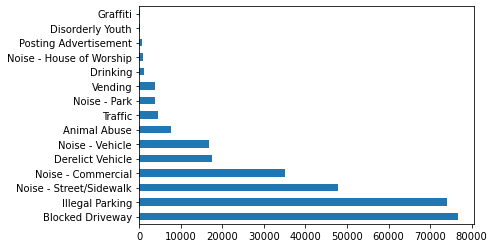

In [161]:
dataset['Complaint Type'].value_counts().plot(kind='barh')

<AxesSubplot:>

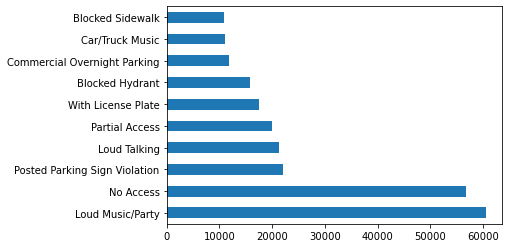

In [162]:
dataset['Descriptor'].value_counts()[:10].plot(kind='barh')

In [163]:
dataset['Borough'].value_counts()

BROOKLYN         96881
QUEENS           79811
MANHATTAN        62074
BRONX            40224
STATEN ISLAND    12214
Name: Borough, dtype: int64

In [164]:
dataset['Complaint Type'].value_counts()[:5]

Blocked Driveway           76697
Illegal Parking            74042
Noise - Street/Sidewalk    47771
Noise - Commercial         35159
Derelict Vehicle           17511
Name: Complaint Type, dtype: int64

In [165]:
top_5_comp=['Blocked Driveway','Illegal Parking','Noise - Street/Sidewalk','Noise - Commercial','Derelict Vehicle']
borough_complaint=dataset.groupby(['Borough','Complaint Type']).size().unstack()
borough_complaint=borough_complaint[top_5_comp]
borough_complaint

Complaint Type,Blocked Driveway,Illegal Parking,Noise - Street/Sidewalk,Noise - Commercial,Derelict Vehicle
Borough,,,,,
BRONX,12741,7831,8864,2431,1949
BROOKLYN,28128,27394,13316,11452,5167
MANHATTAN,2057,11983,20383,14540,530
QUEENS,31630,21951,4392,6058,8102
STATEN ISLAND,2141,4883,816,678,1763


<AxesSubplot:ylabel='Borough'>

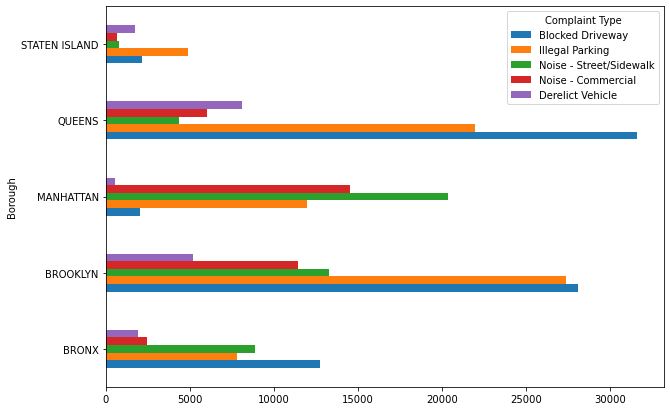

In [171]:
borough_complaint.plot(kind='barh',figsize=(10,7))

<AxesSubplot:>

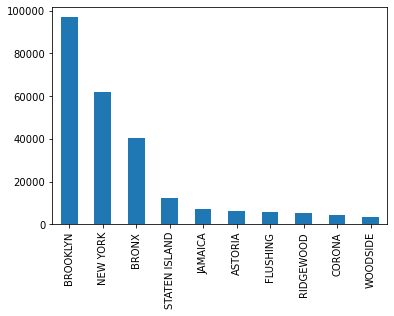

In [167]:
#Top 10 cities with higher no of complaints
dataset['City'].value_counts()[:10].plot(kind='bar')

In [168]:
dataset['Request_Closing_Time'].describe()

count                       291204
mean     0 days 04:18:30.611983351
std      0 days 06:03:42.643823298
min                0 days 00:01:00
25%                0 days 01:16:30
50%                0 days 02:42:38
75%                0 days 05:20:23
max               24 days 16:52:22
Name: Request_Closing_Time, dtype: object

In [172]:
#convert request_closing_time cloumn from days to number of hours
#Since, converting 2:30 hours to timedelta64[h] will give 2 hours, hence we will add 1 and will say that this particular request was closed within 3 hours.
dataset['Request_Closing_Hours']=dataset['Request_Closing_Time'].astype('timedelta64[h]')+1
dataset[['Request_Closing_Time','Request_Closing_Hours']].head()

,Request_Closing_Time,Request_Closing_Hours
0,0 days 00:55:15,1.0
1,0 days 01:26:16,2.0
2,0 days 04:51:31,5.0
3,0 days 07:45:14,8.0
4,0 days 03:27:02,4.0


In [173]:
mean=dataset['Request_Closing_Hours'].mean()
std=dataset['Request_Closing_Hours'].std()
print('mean is ',mean)
print('std is ',std)

mean is  4.818282029093007
std is  6.0636246344163185


In [174]:
dataset['Request_Closing_Hours'].sort_values().tail()

12167     224.0
12168     224.0
21268     520.0
23664     578.0
244488    593.0
Name: Request_Closing_Hours, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x3a5cddc0>,
 'caps': [<matplotlib.lines.Line2D at 0x3a5d04c0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x3a5cda60>],
 'medians': [<matplotlib.lines.Line2D at 0x3a5d0b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x3a5d0ee0>],
 'means': []}

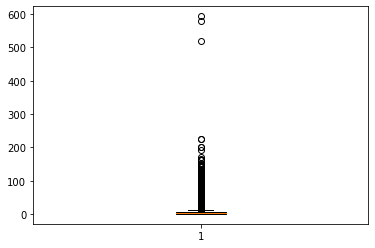

In [175]:
plt.boxplot(dataset['Request_Closing_Hours'],vert=True,patch_artist=True )

#To deal with outliers.....

We will convert the Request Closing time to normal z statistics and will remove any record having value more than 1.

z-statistic = ( value - mean )/std
      
 Next we will plot the histogram of our Request_Closing_Hours.

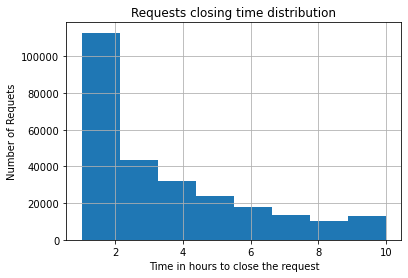

In [176]:
plot_data = dataset[ ((dataset['Request_Closing_Hours']-mean)/std) < 1]
plot_data['Request_Closing_Hours'].hist(bins=8)
plt.xlabel('Time in hours to close the request')
plt.ylabel('Number of Requets')
plt.title('Requests closing time distribution')
plt.show()

In [ ]:
#Above distribution shows that around half of overall complaints were closed within 2 to 4 hours.
#Around 99% of the complaints were closed within 10 hours.

{'whiskers': [<matplotlib.lines.Line2D at 0x385fcd90>,
 'caps': [<matplotlib.lines.Line2D at 0x385f0490>,
 'boxes': [<matplotlib.patches.PathPatch at 0x385fca30>],
 'medians': [<matplotlib.lines.Line2D at 0x385f0b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x385f0eb0>],
 'means': []}

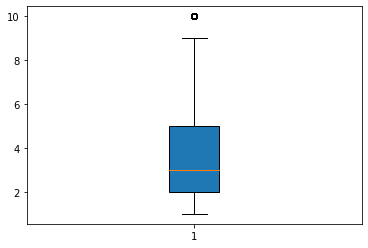

In [177]:
plt.boxplot(plot_data['Request_Closing_Hours'],vert=True,patch_artist=True )

<AxesSubplot:xlabel='Complaint Type'>

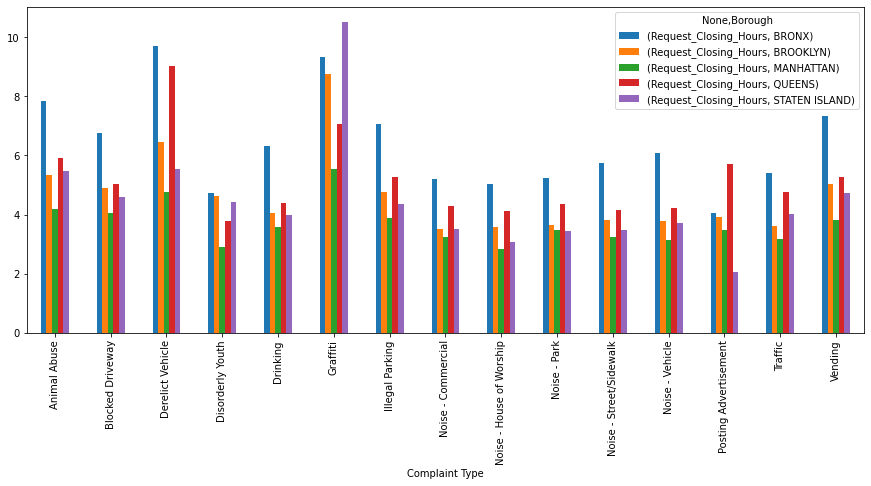

In [178]:
citywise_resolution = dataset.groupby(['Complaint Type','Borough'])[['Request_Closing_Hours']].mean().unstack()
citywise_resolution.plot(kind='bar',figsize=(15,6))

Monthwise analysis of complaints for Borough

<AxesSubplot:title={'center':'Processing time per Borough on a monthly basis'}, xlabel='YYYY-MM'>

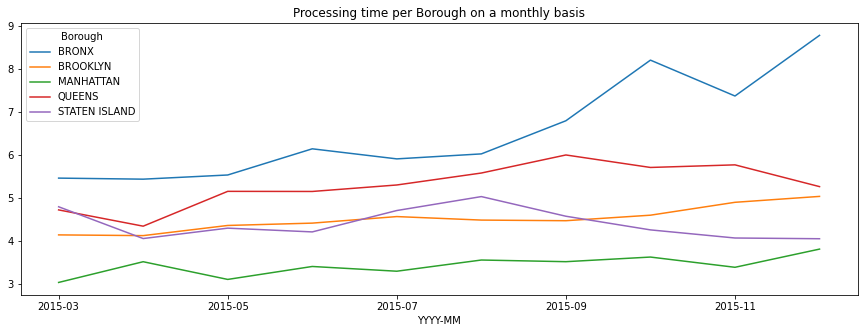

In [180]:
import datetime
dataset['YYYY-MM'] = dataset['Created Date'].apply(lambda x: datetime.datetime.strftime(x, '%Y-%m'))
dataset.groupby(['YYYY-MM','Borough'])['Request_Closing_Hours'].mean().unstack().plot(figsize=(15,5),
        title='Processing time per Borough on a monthly basis')

Manhattan has the best average closing time throughout the year.

Bronx has the highest closing time.

## Hypothesis Testing

Below is the distribution of our Request_Closing_Hours data for 'Noise - Street/Sidewalk' complaint type.
We see a positive skewness in data if we limit the range to 20
As our data contains too many outliers , hence we will transform the data using log transformation

<AxesSubplot:>

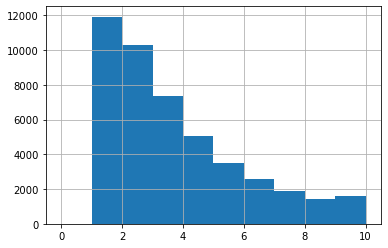

In [181]:
original = dataset[dataset['Complaint Type']=='Noise - Street/Sidewalk']['Request_Closing_Hours']
original.hist(bins=10,range=(0,10))

In [182]:
data = {}
for complaint in dataset['Complaint Type'].unique():
    data[complaint] = np.log(dataset[dataset['Complaint Type']==complaint]['Request_Closing_Hours'])

In [183]:
data.keys()

dict_keys(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking', 'Derelict Vehicle', 'Noise - Commercial', 'Noise - House of Worship', 'Posting Advertisement', 'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic', 'Drinking', 'Noise - Park', 'Graffiti', 'Disorderly Youth'])

<AxesSubplot:>

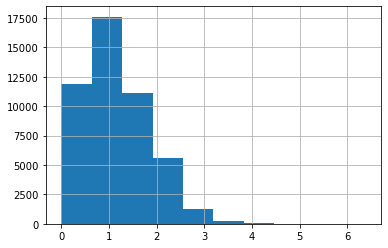

In [184]:
data['Noise - Street/Sidewalk'].hist(bins=10)

In [185]:
for complaint in data.keys():
    print(data[complaint].std())

0.7939751165972492
0.8041036679334743
0.8304140214888582
0.9997989621945236
0.7659684100560324
0.8086034420324043
0.7013844505328135
0.79395431254088
0.8464953333595926
0.8231186131397992
0.846015380667405
0.7923802941357138
0.8058647565080413
0.9022335197084324
0.7649269067215971


To conduct our hypothesis test, we will conduct an ANOVA (analysis of variance) test as we have to compare the means of more than two groups.

Below conditions should be met before conducting ANOVA.

    1) All distributions must follow a normal distributions curve. We have verified this after the log transformation
    2) Standard deviation for all groups must be same. Above output proves that this is true.
    3) All samples are drawn independently of each other.


Null Hypothesis: Average response time for all the complaints type is same.

Alternate Hypothesis: Average response time for all the complaints type is not same and theres is some difference among the groups.

Below We conduct ANOVA test for top 5 type of complaints

For a 95% of confidence interval we choose our alpha as 0.05 for 5%.

Alpha(0.05) is the critical p-value, if our calculated p-value is less than alpha, it will give us strong evidence to reject Null Hypothesis.

if p < alpha(0.05) : Reject Null Hypothesis, Average response time for all the complaints type is not same.

if p > alpha(0.05) : Fail to reject Null Hypothesis, Average response time for all the complaints type is same.

In [186]:
# import f_oneway from scipy.stats library
from scipy.stats import f_oneway

stat, p = f_oneway(data['Noise - Street/Sidewalk'],data['Blocked Driveway'],data['Illegal Parking'],data['Derelict Vehicle'],
                   data['Noise - Commercial'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=2393.511, p=0.000
Different distributions (reject H0)


## Conclusion

    As our p-value is quite low , hence it is being converted to 0.0

    Since our p-value is lowere than our critical p-value, we will conclude that we have enogh evidence to reject Null Hypothesis it means

    Average response time for all the complaints type is not same.

